# Social Preference Analysis

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
# Get the root directory (adjust according to your folder structure)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go up one directory to P2_Code
# Add the root directory to sys.path
sys.path.append(root_dir)

from group_tdt_class import *
from experiment_functions import *
from social_pref.social_pref_extension import *

In [2]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\mpfc"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\mpfc_csvs"
brain_region = '#e06928'


# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\nac_csvs"
# brain_region = '#1a58af'


cup_assignment_csv_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\Social_Pref_sheet.csv"


In [3]:
group_data = GroupTDTData(experiment_path, csv_base_path)
# Batch process the data, removing the specified time segments for subjects
# group_data.batch_process(time_segments_to_remove=None)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\mpfc\p1-240522-080200\Notes.txt
read from t=0s to t=788.46s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\mpfc\p2-240523-081105\Notes.txt
read from t=0s to t=788.65s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\mpfc\p3-240522-092431\Notes.txt
read from t=0s to t=791.39s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\mpfc\p4-240523-092600\Notes.txt
read from t=0s to t=787.78s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\mpfc\p5-240826-091418\Notes.txt
read from t=0s to t=790.95s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\mpfc\p6-240827-065303\Notes.txt
read from t=0s to t=790.44s
Found Synapse no

In [4]:
group_data.sp_processing(cup_assignment_csv_path)

Social Pref Processing p1-240522-080200...
Removed time segment from 178.733s to 187.733s.
Social Pref Processing p2-240523-081105...
Removed time segment from 178.067s to 187.067s.
Social Pref Processing p3-240522-092431...
Removed time segment from 180.267s to 189.267s.
Social Pref Processing p4-240523-092600...
Removed time segment from 178.733s to 187.733s.
Social Pref Processing p5-240826-091418...
Removed time segment from 179.6s to 188.6s.
Social Pref Processing p6-240827-065303...
No 'Subject Presence' events found.
Social Pref Processing p7-240826-102402...
Removed time segment from 179.1s to 188.1s.
Social Pref Processing p8-240827-075823...
Removed time segment from 178.9s to 187.9s.


## Total duration

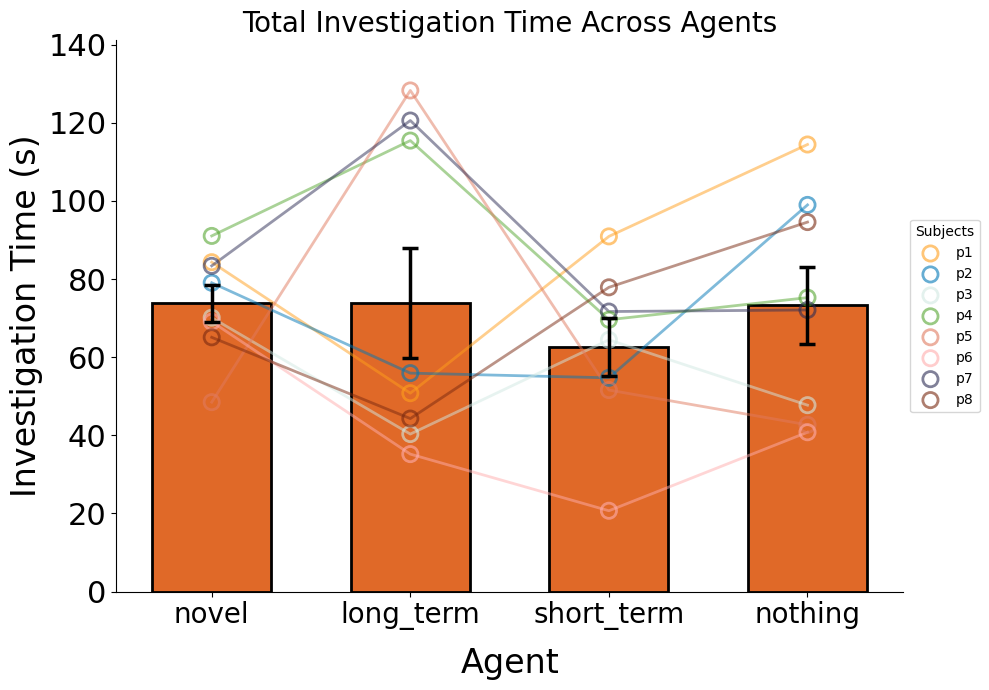

In [14]:
avg_inv_tot_duration_df = sp_extract_total_investigation_time(group_data=group_data, bouts=['novel', 'long_term', 'short_term', 'nothing'])

plot_y_across_bouts(avg_inv_tot_duration_df, 'Total Investigation Time Across Agents','Investigation Time (s)',bar_color=brain_region)

# First Investigations

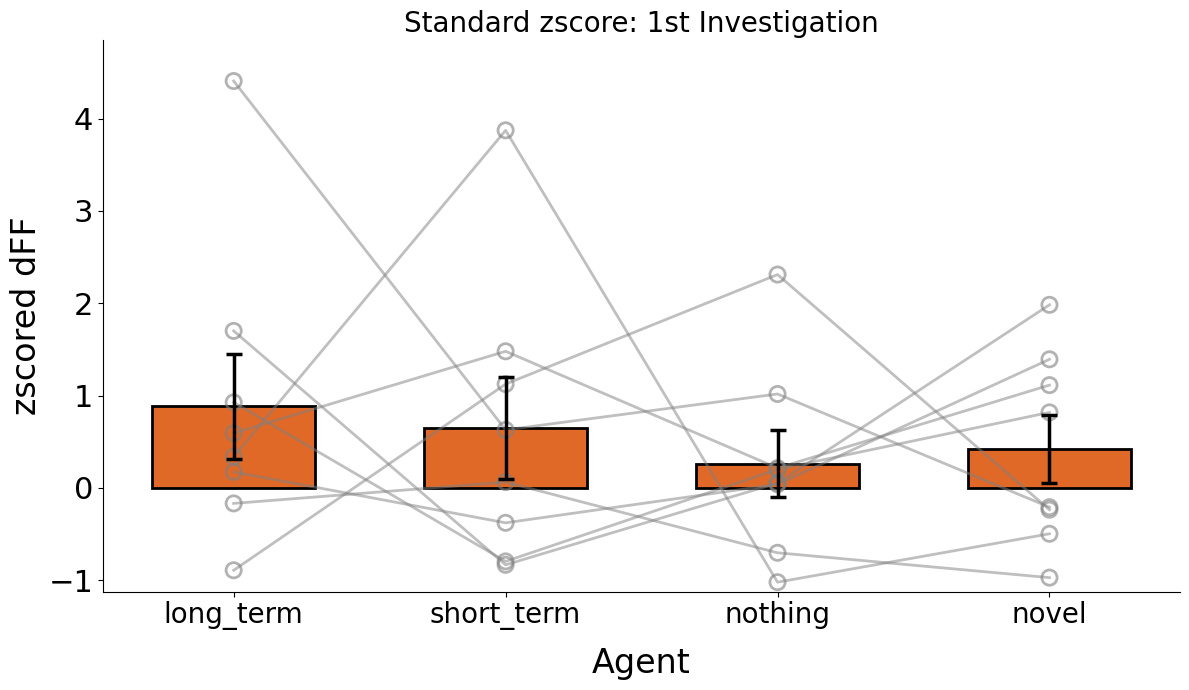

,long_term,short_term,nothing,novel
Subject,,,,
p1,4.407103,0.629120,1.017999,-0.207870
p2,-0.891095,1.125162,2.311199,-0.235382
p3,0.338089,3.873248,-1.020291,-0.496036
p4,0.593888,1.480125,0.215703,1.114039
p5,-0.167008,0.063578,-0.701848,-0.970911
p6,0.926979,-0.795102,0.201930,0.818754
p7,0.173776,-0.377317,0.039489,1.393520
p8,1.701032,-0.832231,0.053223,1.983370


In [12]:
mean_df = sp_extract_nth_investigation_mean_da_corrected(group_data=group_data, n=1,max_duration=5.0)

plot_y_across_bouts_gray(mean_df, 'Standard zscore: 1st Investigation', 'zscored dFF',bar_color=brain_region)
mean_df

In [7]:
group_data.compute_first_bout_peth_all_blocks(
    behavior_name='investigation',
    bouts=['novel', 'long_term', 'short_term', 'nothing'],
    pre_time=5,
    post_time=5
)


No investigation found in novel for p1-240522-080200.
No investigation found in long_term for p1-240522-080200.
No investigation found in short_term for p1-240522-080200.
No investigation found in nothing for p1-240522-080200.
No investigation found in novel for p2-240523-081105.
No investigation found in long_term for p2-240523-081105.
No investigation found in short_term for p2-240523-081105.
No investigation found in nothing for p2-240523-081105.
No investigation found in novel for p3-240522-092431.
No investigation found in long_term for p3-240522-092431.
No investigation found in short_term for p3-240522-092431.
No investigation found in nothing for p3-240522-092431.
No investigation found in novel for p4-240523-092600.
No investigation found in long_term for p4-240523-092600.
No investigation found in short_term for p4-240523-092600.
No investigation found in nothing for p4-240523-092600.
No investigation found in novel for p5-240826-091418.
No investigation found in long_term fo

In [10]:
# Loop through each block in self.blocks
for block_name, block_data in group_data.blocks.items():
    # Print the available bout names in this block
    print(f"Available bouts in block '{block_name}': {list(block_data.behavior_event_dict.keys())}")
    # Rest of your code...


Available bouts in block 'p1-240522-080200': ['Subject Presence', 'long_term', 'short_term', 'nothing', 'novel']
Available bouts in block 'p2-240523-081105': ['Subject Presence', 'nothing', 'short_term', 'long_term', 'novel']
Available bouts in block 'p3-240522-092431': ['Subject Presence', 'short_term', 'nothing', 'novel', 'long_term']
Available bouts in block 'p4-240523-092600': ['Subject Presence', 'novel', 'long_term', 'short_term', 'nothing']
Available bouts in block 'p5-240826-091418': ['Subject Presence', 'novel', 'long_term', 'short_term', 'nothing']
Available bouts in block 'p6-240827-065303': ['long_term', 'short_term', 'nothing', 'novel']
Available bouts in block 'p7-240826-102402': ['Subject Presence', 'novel', 'nothing', 'short_term', 'long_term']
Available bouts in block 'p8-240827-075823': ['Subject Presence', 'novel', 'long_term', 'short_term', 'nothing']
